## 音データの特徴量化

- WAV形式ファイルの読み込み
- FFT: 高速フーリエ変換
- スペクトログラム

### WAV形式ファイルの読み込み

<AxesSubplot:>

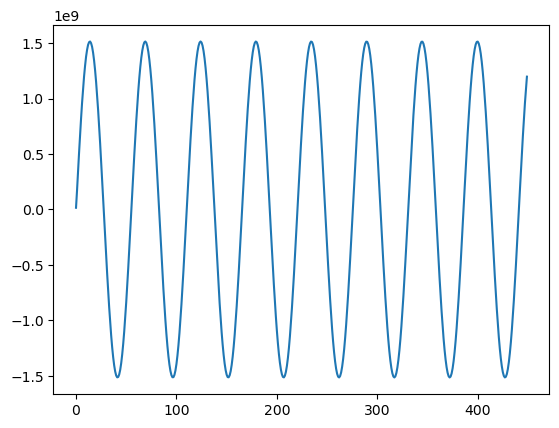

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

file = 'data/sine_400.wav'
# WAV形式ファイルの読み込み
sampling_rate, data = wavfile.read(file)
# 表示
sns.lineplot(x=range(0, 450), y=data[0:450])

### FFT: 高速フーリエ変換

- FFTにより周波数成分を抽出

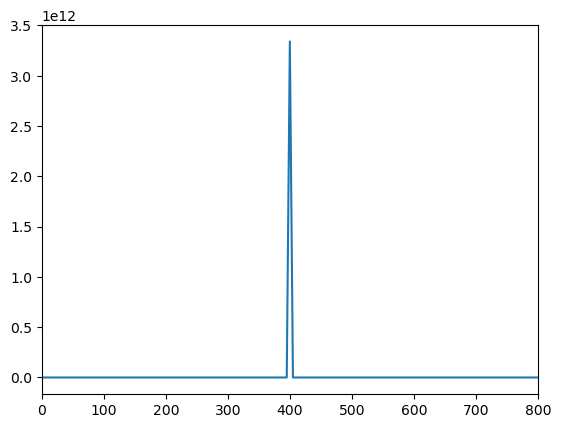

In [2]:
import numpy as np
from scipy.fft import fft, fftfreq

num_samples = len(data)

fft_Y = np.abs(fft(data))
fft_X = fftfreq(num_samples, 1 / sampling_rate)
# 表示
sns.lineplot(x=fft_X, y=fft_Y)
plt.xlim(0, 800)
plt.show()

### スペクトログラム

- スペクトログラムは周波数ごとの強弱を色で描画

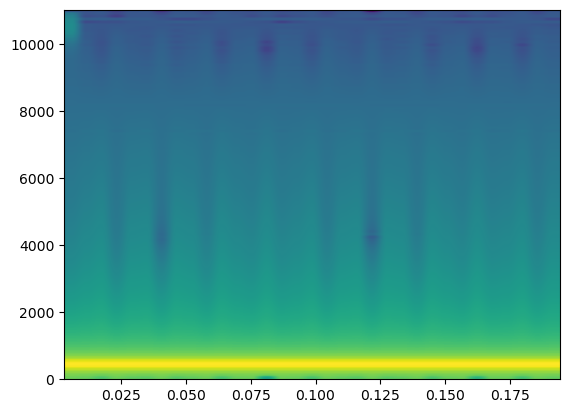

In [3]:
plt.specgram(data, Fs=sampling_rate)
#plt.ylim(0, 3000)
plt.show()

<hr>

関数にまとめる

In [4]:
def display_audio(file):
    # WAV形式ファイルの読み込み
    sampling_rate, data = wavfile.read(file)
    # 表示
    print('波形')
    sns.lineplot(x=range(0, 450), y=data[0:450])
    plt.show()

    # データが長ければ1秒分だけ取り出す
    if (len(data) > sampling_rate):
        data = data[:sampling_rate]

    # FFT変換
    num_samples = len(data)
    fft_Y = np.abs(fft(data))
    fft_X = fftfreq(num_samples, 1 / sampling_rate)
    # 表示
    print('FFT')
    sns.lineplot(x=fft_X, y=fft_Y)
    plt.xlim(0, 10000)
    plt.show()

    # スペクトログラム
    print('スペクトログラム')
    plt.specgram(data, Fs=sampling_rate)
    plt.ylim(0, 10000)
    plt.show()

<hr>

### 400Hzと3000Hzを混合したサイン波

波形


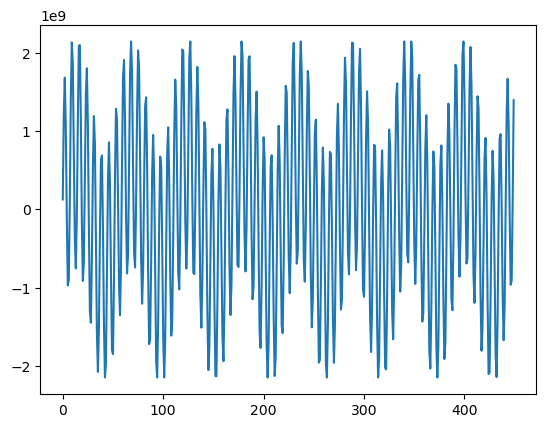

FFT


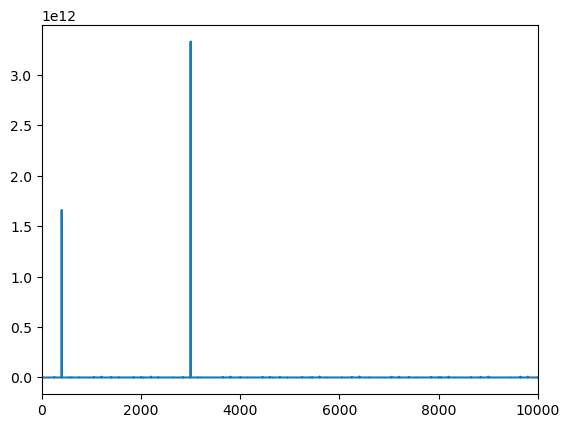

スペクトログラム


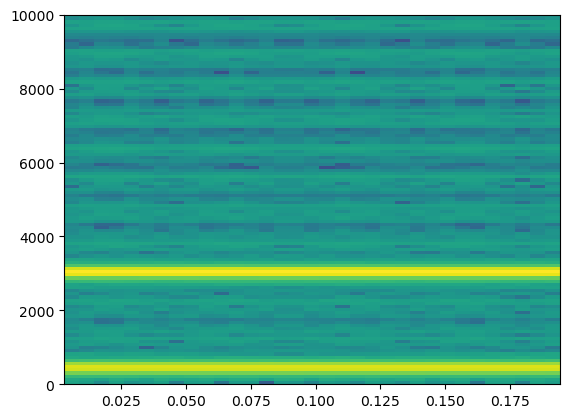

In [5]:
display_audio('data/sine_mix.wav')

<hr>

クラシック音楽

波形


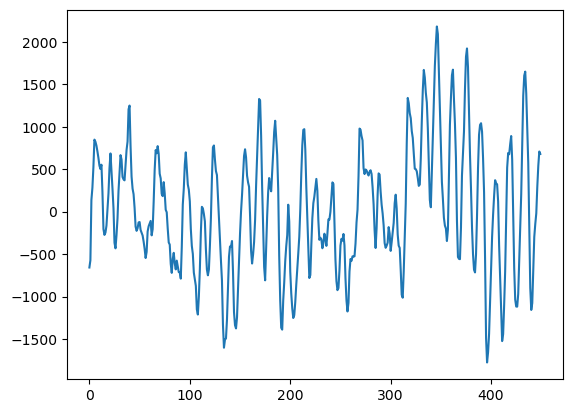

FFT


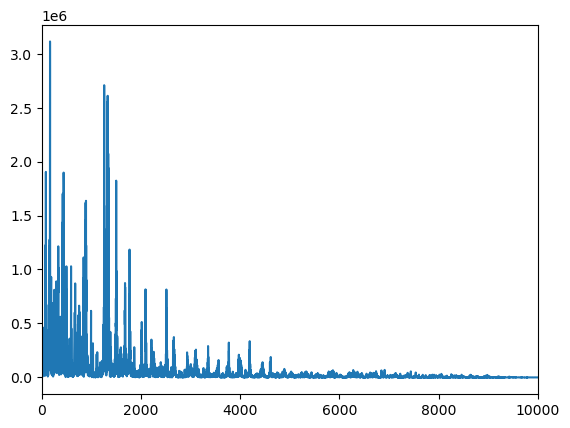

スペクトログラム


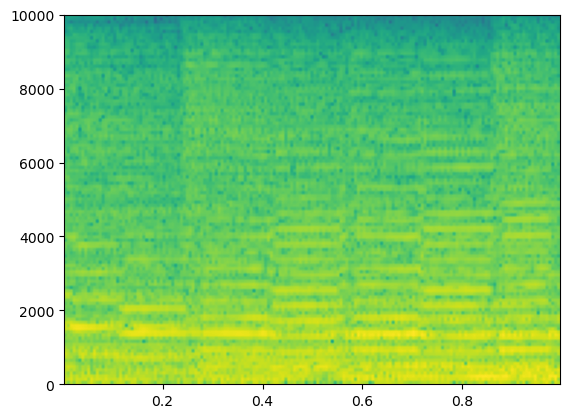

In [6]:
display_audio('data/genres/classical/classical.00000.wav')

<hr>

### 異なるジャンルの音楽の波形の比較

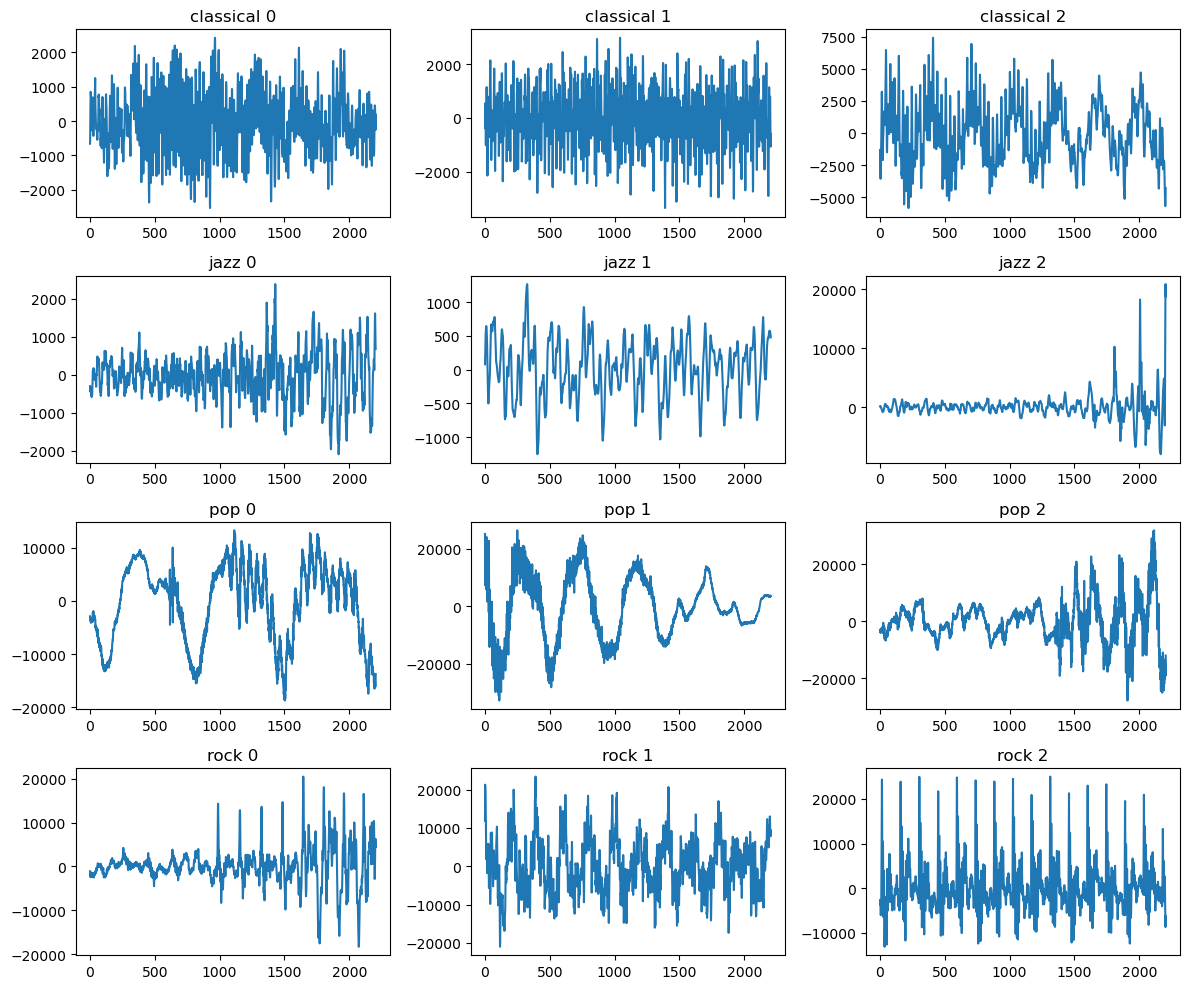

In [7]:
path = 'data/genres/'
genres = ['classical', 'jazz', 'pop', 'rock']
nfiles = 3

f, axes = plt.subplots(len(genres), nfiles, figsize=(12, 10))

for g in genres:
    for i in range(0, nfiles):
        file = '{}{}/{}.{:05}.wav'.format(path, g, g, i)
        sampling_rate, X = wavfile.read(file)
        ax = axes[genres.index(g), i]
        ax.set_title('{} {}'.format(g, i))
        # 先頭 0.1 秒分を描画
        # - 22050 Hz サンプリング（1秒間に22050点）
        sns.lineplot(x=range(0, 2205), y=X[0:2205], ax=ax)

plt.tight_layout()

### 異なるジャンルの音楽のFFT結果の比較

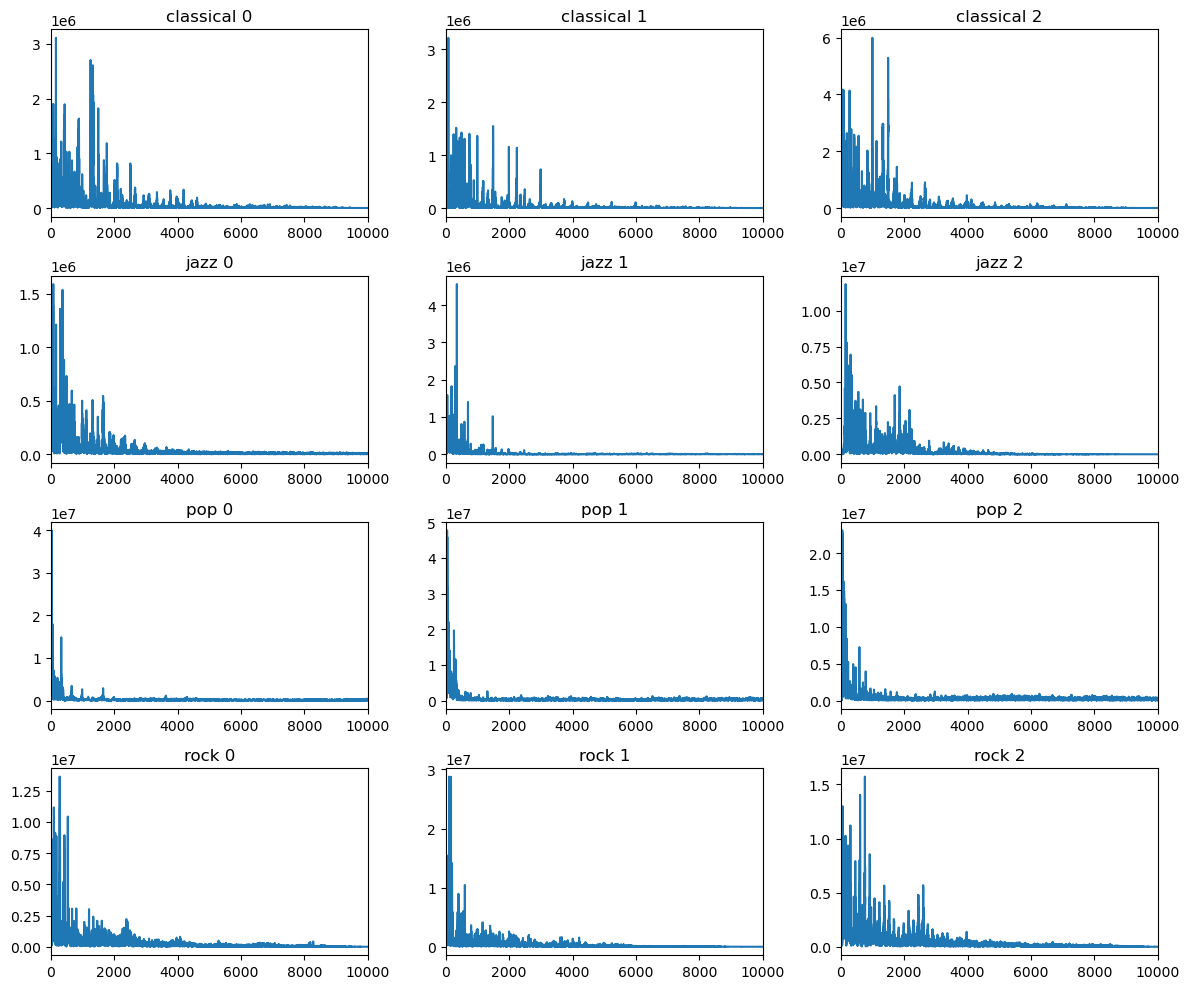

In [8]:
f, axes = plt.subplots(len(genres), nfiles, figsize=(12, 10))

for g in genres:
    for i in range(0, nfiles):
        file = '{}{}/{}.{:05}.wav'.format(path, g, g, i)
        sampling_rate, X = wavfile.read(file)
        ax = axes[genres.index(g), i]
        ax.set_title('{} {}'.format(g, i))
        #
        X = X[:sampling_rate]
        num_samples = len(X)
        fft_Y = np.abs(fft(X))
        fft_X = fftfreq(num_samples, 1 / sampling_rate)
        # 表示
        sns.lineplot(x=fft_X, y=fft_Y, ax=ax)
        ax.set_xlim([0, 10000])

plt.tight_layout()

### 異なるジャンルの音楽のスペクトログラムの比較

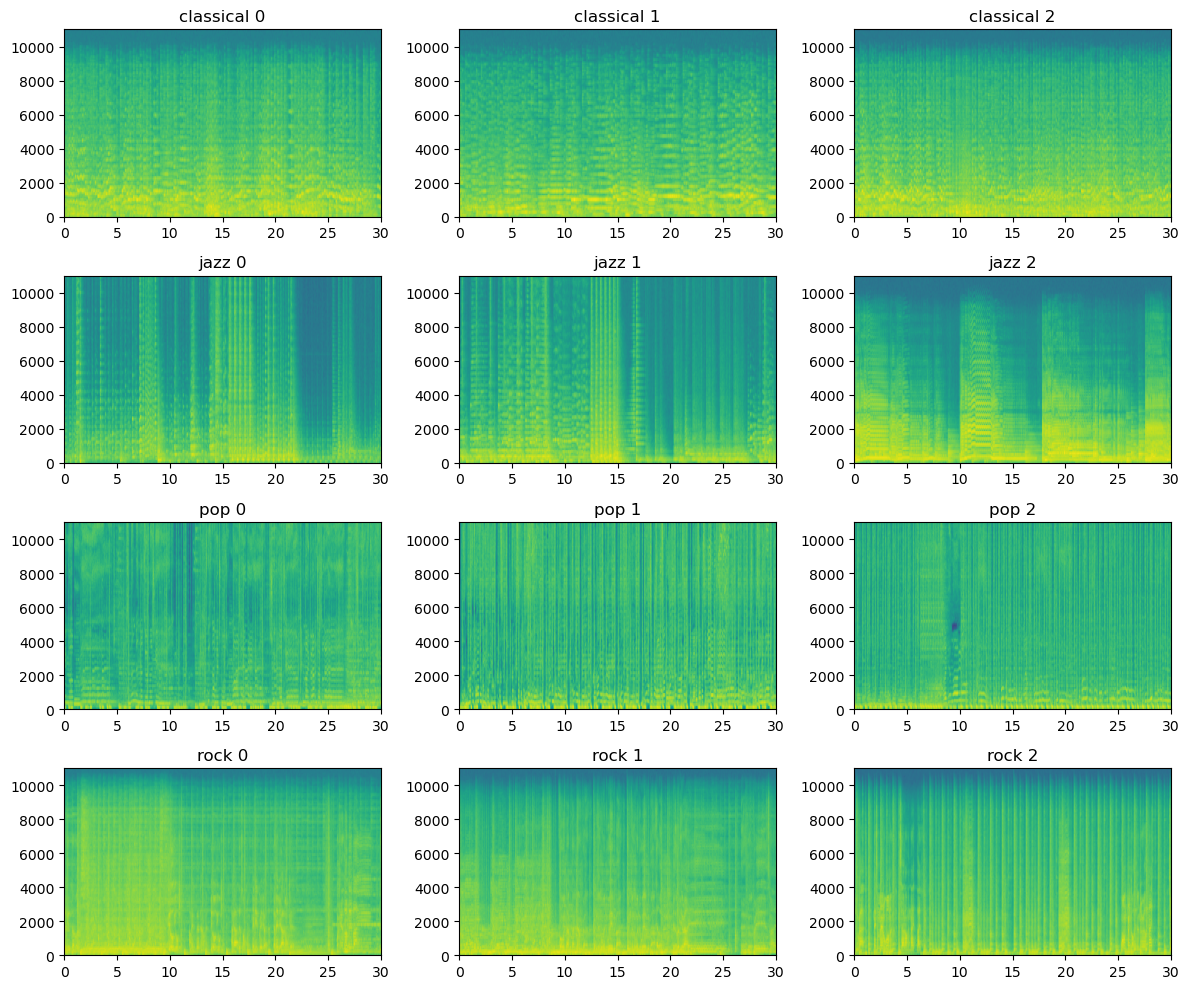

In [9]:
f, axes = plt.subplots(len(genres), nfiles, figsize=(12, 10))

for g in genres:
    for i in range(0, nfiles):
        file = '{}{}/{}.{:05}.wav'.format(path, g, g, i)
        sampling_rate, X = wavfile.read(file)
        ax = axes[genres.index(g), i]
        ax.set_title('{} {}'.format(g, i))
        ax.specgram(X, Fs=sampling_rate, xextent=(0, 30))

plt.tight_layout()